In [1]:
### Importer les modules ###
import os
import glob
import scipy
import pylab
import poppy
import tables
import pyphot
import numpy as np
from scipy import signal
from astropy.io import ascii
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift

In [24]:
N_pas = 100000
### wavelength range ### (nm)
u = np.linspace(350.0,440.0,N_pas)
g = np.linspace(427.0,545.0,N_pas)
r = np.linspace(522.0,680.0,N_pas)
i = np.linspace(656.0,850.0,N_pas)

### Spectral Lines ###
# lambda_obs = (1+z)*lambda
# Unit = Ångström
# Emission Lines
O4 = 1033.82 
ly_alpha = 1215.67
N5 = 1240.81
O1 = [1305.53,6302.046,6365.536]
C2 = 1335.31
Si4 = 1397.61
Si4_plus_O4 = 1399.8
C4 = 1549.48
He2 = 1640.4
O3 = [1665.85,4364.436,4932.603,4960.295,5008.240]
Al3 = 1857.4
C3 = 1908.734
C2 = 2326.0
Ne4 = 2439.5
Mg2 = 2799.117
Ne5 = 3346.79
Ne6 = 3426.85
O2 = [3727.092,3729.875]
He1 = 3889.0
S2 = [4072.3,6718.29,6732.67]
H_delta = 4102.89
H_gamma = 4341.68
H_beta = 4862.68

N1 = 6529.03
N2 = [6549.86,6585.27]
H_alpha = 6564.61

O = [O4] + O1 + O2 + O3
O.sort()

C = [C2,C4,C3,C2]

H = [H_delta,H_gamma,H_beta,H_alpha]

# Absorption Lines
ab_K = 3934.777
ab_H = 3969.588
ab_G = 4305.61
ab_Mg = 5167.7
ab_Na = 5895.6
ab_Ca2 = [8500.36,8544.44,8664.52]

# Sky Lines
Sky = [5578.5,5894.6,6301.7,7246.0]

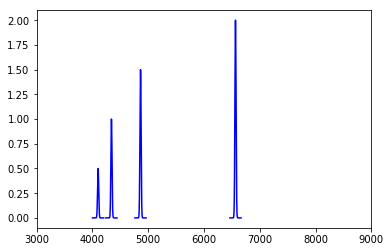

In [23]:
gauss_pas = 1000
Gauss = signal.gaussian(gauss_pas, std=50, sym=False)
# x = [[]]*len(H)
for i in range(len(H)):
    x = np.linspace(H[i]-100,H[i]+100,gauss_pas)
    plt.plot(x,Gauss*(i+1)*0.5,'-b')    
plt.xlim(3000,9000)
plt.show()

In [4]:
# Fonction gaussienne
# esperance et variance
def fct_Gauss(x,esp,var):
    return ((1./np.sqrt(var*2*np.pi))*np.exp(-0.5*(x-esp)**2/var))

wav = np.arange(3000, 9000, 1e-3)
x_H_alpha = np.arange(H_alpha-100,H_alpha+100,1e-3)
sig = np.zeros(len(wav))
for x_H_alpha in wav_aa:
    for i in x_H_alpha:
        fct_Gauss(i,H_alpha,1)
    

In [6]:
# Basic black-body spectrum plot
h = 6.62606885e-34 # Planck constant
c = 2.99792458e+8  # speed of light
k = 1.38064852e-23 # Boltzmann constant
def signal_test0(x,esp,var,wav_aa,spectral_lines):
    feature = np.zeros(len(wav_aa))
    if spectral_lines in wav_aa:
        if len(spectral_line) == 1:
            x = np.arange(spectral_line*0.98,spectral_line*1.02,1e-3)
            
            
            feature += (1./np.sqrt(var*2*np.pi))*np.exp(-0.5*(x-esp)**2/var)
        elif len(spectral_line) == 0:
            pass
        else:
            for i in range(len(spectral_line)):
                xx = np.arange(spectral_line[i]*0.98,spectral_line[i]*1.02,1e-3)
                
                
                feature += feature + (1./np.sqrt(var*2*np.pi))*np.exp(-0.5*(xx-esp)**2/var)
                
                
        gauss = (1./np.sqrt(var*2*np.pi))*np.exp(-0.5*(x-esp)**2/var)
    
    wav = wav_aa * 1e-10
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity + feature

In [22]:
a = np.arange(2,4,1e-3)
b = np.arange(0,5,1e-3)
for a in b:
    print(a)

0.0
0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001
0.01
0.011
0.012
0.013000000000000001
0.014
0.015
0.016
0.017
0.018000000000000002
0.019
0.02
0.021
0.022
0.023
0.024
0.025
0.026000000000000002
0.027
0.028
0.029
0.03
0.031
0.032
0.033
0.034
0.035
0.036000000000000004
0.037
0.038
0.039
0.04
0.041
0.042
0.043000000000000003
0.044
0.045
0.046
0.047
0.048
0.049
0.05
0.051000000000000004
0.052000000000000005
0.053
0.054
0.055
0.056
0.057
0.058
0.059000000000000004
0.06
0.061
0.062
0.063
0.064
0.065
0.066
0.067
0.068
0.069
0.07
0.07100000000000001
0.07200000000000001
0.073
0.074
0.075
0.076
0.077
0.078
0.079
0.08
0.081
0.082
0.083
0.084
0.085
0.08600000000000001
0.08700000000000001
0.088
0.089
0.09
0.091
0.092
0.093
0.094
0.095
0.096
0.097
0.098
0.099
0.1
0.101
0.10200000000000001
0.10300000000000001
0.10400000000000001
0.105
0.106
0.107
0.108
0.109
0.11
0.111
0.112
0.113
0.114
0.115
0.116
0.117
0.11800000000000001
0.11900000000000001
0.12
0.121
0.122
0.123
0.124
0.12

1.224
1.225
1.226
1.227
1.228
1.229
1.23
1.231
1.232
1.233
1.234
1.235
1.236
1.237
1.238
1.239
1.24
1.241
1.242
1.243
1.244
1.245
1.246
1.247
1.248
1.249
1.25
1.2510000000000001
1.252
1.2530000000000001
1.254
1.2550000000000001
1.256
1.2570000000000001
1.258
1.2590000000000001
1.26
1.2610000000000001
1.262
1.2630000000000001
1.264
1.2650000000000001
1.266
1.2670000000000001
1.268
1.2690000000000001
1.27
1.2710000000000001
1.272
1.2730000000000001
1.274
1.2750000000000001
1.276
1.2770000000000001
1.278
1.2790000000000001
1.28
1.281
1.282
1.283
1.284
1.285
1.286
1.287
1.288
1.289
1.29
1.291
1.292
1.293
1.294
1.295
1.296
1.297
1.298
1.299
1.3
1.301
1.302
1.303
1.304
1.305
1.306
1.307
1.308
1.309
1.31
1.311
1.312
1.313
1.314
1.315
1.316
1.317
1.318
1.319
1.32
1.321
1.322
1.323
1.324
1.325
1.326
1.327
1.328
1.329
1.33
1.331
1.332
1.333
1.334
1.335
1.336
1.337
1.338
1.339
1.34
1.341
1.342
1.343
1.344
1.345
1.346
1.347
1.348
1.349
1.35
1.351
1.352
1.353
1.354
1.355
1.356
1.357
1.358
1.359
1.3

2.388
2.3890000000000002
2.39
2.391
2.392
2.3930000000000002
2.394
2.395
2.396
2.3970000000000002
2.398
2.399
2.4
2.4010000000000002
2.402
2.403
2.404
2.4050000000000002
2.406
2.407
2.408
2.4090000000000003
2.41
2.411
2.412
2.4130000000000003
2.414
2.415
2.416
2.4170000000000003
2.418
2.419
2.42
2.4210000000000003
2.422
2.423
2.424
2.4250000000000003
2.426
2.427
2.428
2.4290000000000003
2.43
2.431
2.432
2.433
2.434
2.435
2.436
2.437
2.438
2.439
2.44
2.441
2.442
2.443
2.444
2.445
2.446
2.447
2.448
2.449
2.45
2.451
2.452
2.453
2.454
2.455
2.456
2.457
2.458
2.459
2.46
2.461
2.462
2.463
2.464
2.465
2.466
2.467
2.468
2.469
2.47
2.471
2.472
2.473
2.474
2.475
2.476
2.477
2.478
2.479
2.48
2.481
2.482
2.483
2.484
2.485
2.486
2.487
2.488
2.489
2.49
2.491
2.492
2.493
2.494
2.495
2.496
2.497
2.498
2.499
2.5
2.501
2.5020000000000002
2.503
2.504
2.505
2.5060000000000002
2.507
2.508
2.509
2.5100000000000002
2.511
2.512
2.513
2.5140000000000002
2.515
2.516
2.517
2.5180000000000002
2.519
2.52
2.521
2.5

3.539
3.54
3.541
3.5420000000000003
3.543
3.544
3.545
3.5460000000000003
3.547
3.548
3.549
3.5500000000000003
3.551
3.552
3.553
3.5540000000000003
3.555
3.556
3.557
3.5580000000000003
3.559
3.56
3.561
3.5620000000000003
3.563
3.564
3.565
3.5660000000000003
3.567
3.568
3.569
3.5700000000000003
3.571
3.572
3.573
3.5740000000000003
3.575
3.576
3.577
3.5780000000000003
3.579
3.58
3.581
3.5820000000000003
3.583
3.584
3.585
3.586
3.587
3.588
3.589
3.59
3.591
3.592
3.593
3.594
3.595
3.596
3.597
3.598
3.599
3.6
3.601
3.602
3.603
3.604
3.605
3.606
3.607
3.608
3.609
3.61
3.611
3.612
3.613
3.614
3.615
3.616
3.617
3.618
3.619
3.62
3.621
3.622
3.623
3.624
3.625
3.626
3.6270000000000002
3.628
3.629
3.63
3.6310000000000002
3.632
3.633
3.634
3.6350000000000002
3.636
3.637
3.638
3.6390000000000002
3.64
3.641
3.642
3.6430000000000002
3.644
3.645
3.646
3.6470000000000002
3.648
3.649
3.65
3.6510000000000002
3.652
3.653
3.654
3.6550000000000002
3.656
3.657
3.658
3.6590000000000003
3.66
3.661
3.662
3.663000

4.689
4.69
4.691
4.692
4.6930000000000005
4.694
4.695
4.696
4.697
4.698
4.699
4.7
4.7010000000000005
4.702
4.703
4.704
4.705
4.706
4.707
4.708
4.7090000000000005
4.71
4.711
4.712
4.713
4.714
4.715
4.716
4.7170000000000005
4.718
4.719
4.72
4.721
4.722
4.723
4.724
4.7250000000000005
4.726
4.727
4.728
4.729
4.73
4.731
4.732
4.7330000000000005
4.734
4.735
4.736
4.737
4.738
4.739
4.74
4.741
4.742
4.743
4.744
4.745
4.746
4.747
4.748
4.749
4.75
4.751
4.752
4.753
4.7540000000000004
4.755
4.756
4.757
4.758
4.759
4.76
4.761
4.7620000000000005
4.763
4.764
4.765
4.766
4.767
4.768
4.769
4.7700000000000005
4.771
4.772
4.773
4.774
4.775
4.776
4.777
4.7780000000000005
4.779
4.78
4.781
4.782
4.783
4.784
4.785
4.7860000000000005
4.787
4.788
4.789
4.79
4.791
4.792
4.793
4.7940000000000005
4.795
4.796
4.797
4.798
4.799
4.8
4.801
4.8020000000000005
4.803
4.804
4.805
4.806
4.807
4.808
4.809
4.8100000000000005
4.811
4.812
4.813
4.814
4.815
4.816
4.817
4.8180000000000005
4.819
4.82
4.821
4.822
4.823
4.824
4.8

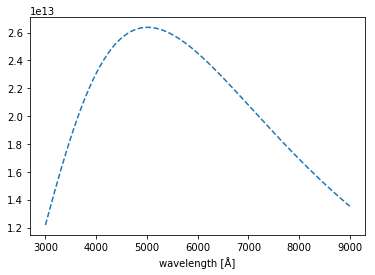

In [64]:
# Basic black-body spectrum plot
h = 6.62606885e-34 # Planck constant
c = 2.99792458e+8  # speed of light
k = 1.38064852e-23 # Boltzmann constant

H_alpha = 6564.61

def planck(wav_aa, T):
    wav = wav_aa * 1e-10
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

T = 5778 # Sun
wav = np.arange(3000, 9000, 1e-3)
signal = np.zeros(len(wav))
signal = planck(wav,T) + []

plt.plot(wav,planck(wav, T),'--')
plt.plot(wav,signal)
plt.xlabel('wavelength [Å]')
plt.show()

In [60]:
signal = []
x = [[]]*len(H)
for i in range(len(H)):
    x[i].append(np.linspace(H[i]*0.98,H[i]*1.02,gauss_pas))

z = [i for i in x if i in wav]
print (z)


# plt.plot(wav*1e10,signal)
# plt.xlabel('wavelength [Å]')
# plt.show()

[]


/home/jinlng/test_dir/test_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


In [ ]:
start = time.time()
domaine = np.arange(3000, 9000, 1)
x_feature = np.arange(H_alpha-100,H_alpha+100,1)
signal = np.zeros(len(domaine))
amp = np.max(planck(domaine,T_sol))
for i in range(len(domaine)):
    if domaine[i] in x_feature:
        signal[i] = planck(domaine[i],T_sol) + fct_Gauss(domaine[i],H_alpha,1)*amp*0.2
    else:
        signal[i] = planck(domaine[i],T_sol)